(-0.5, 639.5, 450.5, -0.5)

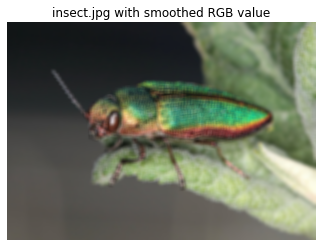

In [1]:
from skimage import util, io, filters, morphology, color, exposure
import matplotlib.pyplot as plt
import numpy as np

insect_rgb = io.imread('Images/insect.jpg')
insect_r = insect_rgb[:,:,0]
insect_g = insect_rgb[:,:,1]
insect_b = insect_rgb[:,:,2]
insect_r_smooth = filters.rank.mean(insect_r, selem=morphology.square(9))
insect_g_smooth = filters.rank.mean(insect_g, selem=morphology.square(9))
insect_b_smooth = filters.rank.mean(insect_b, selem=morphology.square(9))

insect_rgb_smooth = util.img_as_ubyte(np.zeros(insect_rgb.shape))
insect_rgb_smooth[:,:,0] = insect_r_smooth
insect_rgb_smooth[:,:,1] = insect_g_smooth
insect_rgb_smooth[:,:,2] = insect_b_smooth

plt.subplot(1,1,1);
plt.imshow(insect_rgb_smooth); 
plt.title('insect.jpg with smoothed RGB value'); plt.axis('off')

/Users/faishal/opt/anaconda2/envs/mypython3/lib/python3.7/site-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 639.5, 450.5, -0.5)

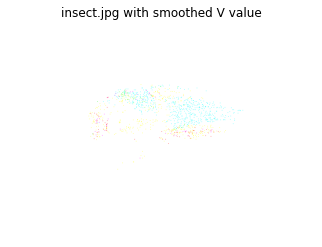

In [2]:
insect_hsv = color.rgb2hsv(insect_rgb)
insect_rgb2 = color.hsv2rgb(insect_hsv)

insect_h = insect_hsv[:,:,0]
insect_s = insect_hsv[:,:,1]
insect_v = insect_hsv[:,:,2]

insect_v_smooth = filters.rank.mean(insect_v, selem=morphology.square(9))

insect_rgb_zeros = util.img_as_ubyte(np.zeros(insect_rgb.shape))
insect_hsv_vsmooth = color.rgb2hsv(insect_rgb_zeros)

insect_hsv_vsmooth[:,:,0] = insect_h
insect_hsv_vsmooth[:,:,1] = insect_s
insect_hsv_vsmooth[:,:,2] = insect_v_smooth

insect_rgb_vsmooth = color.hsv2rgb(insect_hsv_vsmooth)

plt.subplot(1,1,1);
plt.imshow(insect_rgb_vsmooth);
plt.title('insect.jpg with smoothed V value');
plt.axis('off')

(-0.5, 639.5, 450.5, -0.5)

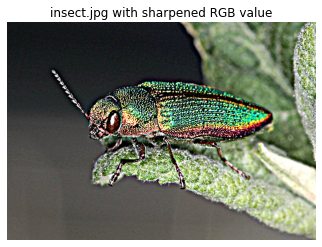

In [3]:
insect_r_sharp = util.img_as_ubyte(filters.unsharp_mask(insect_r, radius=5, amount=2))
insect_g_sharp = util.img_as_ubyte(filters.unsharp_mask(insect_g, radius=5, amount=2))
insect_b_sharp = util.img_as_ubyte(filters.unsharp_mask(insect_b, radius=5, amount=2))

insect_rgb_sharp = util.img_as_ubyte(np.zeros(insect_rgb.shape))
insect_rgb_sharp[:,:,0] = insect_r_sharp
insect_rgb_sharp[:,:,1] = insect_g_sharp
insect_rgb_sharp[:,:,2] = insect_b_sharp

plt.subplot(1,1,1);
plt.imshow(insect_rgb_sharp);
plt.title('insect.jpg with sharpened RGB value');
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 639.5, 450.5, -0.5)

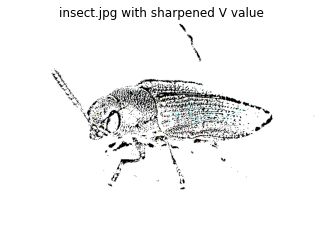

In [4]:
insect_v_sharp = util.img_as_ubyte(filters.unsharp_mask(insect_v, radius=5, amount=2))

insect_hsv_vsharp = color.rgb2hsv(insect_rgb_zeros)
insect_hsv_vsharp[:,:,0] = insect_h
insect_hsv_vsharp[:,:,1] = insect_s
insect_hsv_vsharp[:,:,2] = insect_v_sharp

insect_rgb_vsharp = color.hsv2rgb(insect_hsv_vsharp)

plt.subplot(1,1,1);
plt.imshow(insect_rgb_vsharp);
plt.title('insect.jpg with sharpened V value');
plt.axis('off')

(-0.5, 1279.5, 913.5, -0.5)

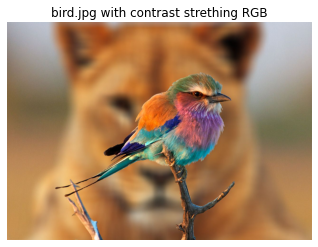

In [5]:
bird_rgb = io.imread('Images/bird.jpg')
bird_r = bird_rgb[:,:,0]
bird_g = bird_rgb[:,:,1]
bird_b = bird_rgb[:,:,2]

def get_cs_value(image):
    image_max = max(image.flatten())
    image_min = min(image.flatten())
    b = int(np.floor(255/(image_max-image_min)))
    image_cs = (image - image_min)*b
    return image_cs

bird_r_cs = get_cs_value(bird_r)
bird_g_cs = get_cs_value(bird_g)
bird_b_cs = get_cs_value(bird_b)

bird_rgb_cs = util.img_as_ubyte(np.zeros(bird_rgb.shape))
bird_rgb_cs[:,:,0] = bird_r_cs
bird_rgb_cs[:,:,1] = bird_g_cs
bird_rgb_cs[:,:,2] = bird_b_cs

plt.subplot(1,1,1);
plt.imshow(bird_rgb_cs);
plt.title('bird.jpg with contrast strething RGB');
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1279.5, 913.5, -0.5)

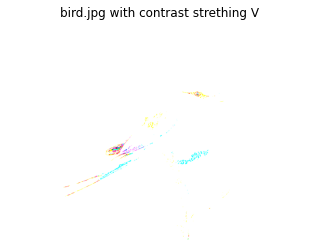

In [6]:
bird_hsv = color.rgb2hsv(bird_rgb)
bird_h = bird_hsv[:,:,0]
bird_s = bird_hsv[:,:,1]
bird_v = bird_hsv[:,:,2]

bird_v_cs = get_cs_value(bird_v)

bird_rgb_zeros = util.img_as_ubyte(np.zeros(bird_rgb.shape))
bird_hsv_vcs = color.rgb2hsv(bird_rgb_zeros)

bird_hsv_vcs[:,:,0] = bird_h
bird_hsv_vcs[:,:,1] = bird_s
bird_hsv_vcs[:,:,2] = bird_v_cs

bird_rgb_vcs = color.hsv2rgb(bird_hsv_vcs)

plt.subplot(1,1,1);
plt.imshow(bird_rgb_vcs);
plt.title('bird.jpg with contrast strething V');
plt.axis('off')

/Users/faishal/opt/anaconda2/envs/mypython3/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


(-0.5, 1279.5, 913.5, -0.5)

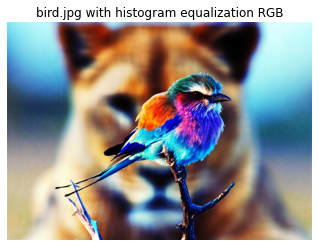

In [7]:
def get_hist_eq(image):
    return exposure.equalize_hist(image)

bird_r_hist = get_hist_eq(bird_r)
bird_g_hist = get_hist_eq(bird_g)
bird_b_hist = get_hist_eq(bird_b)

bird_rgb_hist_init = util.img_as_ubyte(np.zeros(bird_rgb.shape))
bird_rgb_hist = get_hist_eq(bird_rgb_hist_init)

bird_rgb_hist[:,:,0] = bird_r_hist
bird_rgb_hist[:,:,1] = bird_g_hist
bird_rgb_hist[:,:,2] = bird_b_hist

plt.subplot(1,1,1);
plt.imshow(bird_rgb_hist, cmap='gray');
plt.title('bird.jpg with histogram equalization RGB');
plt.axis('off')

(-0.5, 1279.5, 913.5, -0.5)

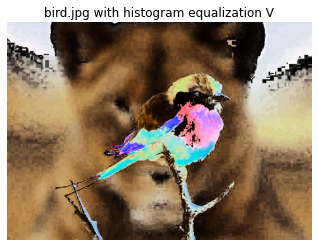

In [8]:
bird_v_hist = get_hist_eq(bird_h)

bird_vhist_zeros = color.rgb2hsv(bird_rgb_hist_init)
bird_hsv_vhist = get_hist_eq(bird_vhist_zeros)

bird_hsv_vhist[:,:,0] = bird_h
bird_hsv_vhist[:,:,1] = bird_s
bird_hsv_vhist[:,:,2] = bird_v_hist

bird_rgb_vhist = color.hsv2rgb(bird_hsv_vhist)

plt.subplot(1,1,1);
plt.imshow(bird_rgb_vhist, cmap='gray');
plt.title('bird.jpg with histogram equalization V');
plt.axis('off')